# Bitcoin Price Forecasting and Sentiment Predictor Using Twitter Data

## Introduction

This project focuses on analyzing and forecasting Bitcoin's price using historical data from Binance and correlating it with public sentiment from Twitter. It involves three main datasets: Binance price data, Google search trends, and a large collection of Bitcoin-related tweets. The analysis includes data cleaning, visualizations, and cross-dataset analysis to explore potential correlations between Bitcoin price, search trends, and tweet sentiment. The project also employs machine learning techniques for price forecasting. The insights gained can be valuable for traders, investors, and researchers interested in understanding the influence of public sentiment on cryptocurrency prices.

# Data Dictionary

In [1]:
import pandas as pd

dd1=pd.read_csv("dd_before_cleaning.csv")
dd2=pd.read_csv("dd_after_cleaning.csv")
dd2

Colmn Name Data Type  \
0                                       Time    String   
1                                       Open     Float   
2       Percent change in price (close/open)     Float   
3                                      Close     Float   
4                         BTC Dominance Open     Float   
5   Percent change in dominance (close/open)     Float   
6                        BTC Dominance Close     Float   
7                                     Volume     Float   
8              RSI (relative strength index)     Float   
9                 HV (historical volatility)     Float   
10                                 Cleantext    String   
11                      bitcoin_tweetcount     Integer   
12                            btc_tweetcount   Integer   
13                        crypto_tweetcount    Integer   
14                cryptocurrency_tweetcount    Integer   
15                       project_tweetcount    Integer   
16                    total count_tweetcount   Integer   

                                          Description  
0                                        Time in days  
1                               Open price of bitcoin  
2   The percent change of the open price to the cl...  
3                              Close price of bitcoin  
4          The opening percent marketshare of Bitcoin  
5   The percent change in Bitcoin marketshare each...  
6          The closing percent marketshare of Bitcoin  
7   The total bitcoin volume per day on the exchan...  
8   The Relative Strength Index (RSI) is a well ve...  
9   Historical volatility is a statistical measure...  
10                      Text of each individual tweet  
11  Total tweets including the keyword bitcoin per...  
12     Total tweets including the keyword btc per day  
13  Total tweets including the keyword crypto per day  
14  Total tweets including the keyword cryptocurre...  
15  Total tweets including the keyword project per...  
16                               Total tweets per day

## Importing the libraries and necessary dataset files

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string



In [3]:
trends_df=pd.read_csv('Bitcoin google search trends.csv',skiprows=2)
bitcoin_df=pd.read_csv('bitcoin_data.csv')
tweets_df=pd.read_csv('bitcoin_tweets.csv', encoding='ISO-8859-1')

/var/folders/n9/pydr1fpn3pz3xvl2kpqw585w0000gn/T/ipykernel_70854/3164856090.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_df=pd.read_csv('bitcoin_tweets.csv', encoding='ISO-8859-1')


In [4]:
bitcoin_df.head()

time     open Percent change in price (close/open)  \
0  2017-08-16T20:00:00-04:00  4261.48                              0.5538%   
1  2017-08-17T20:00:00-04:00  4285.08                             -4.1238%   
2  2017-08-18T20:00:00-04:00  4108.37                              0.7694%   
3  2017-08-19T20:00:00-04:00  4120.98                             -0.8418%   
4  2017-08-20T20:00:00-04:00  4069.13                             -1.3057%   

     close  BTC Dominance Open Percent change in dominance (close/open)  \
0  4285.08           58.028157                                 -1.4775%   
1  4108.37           57.249988                                 -6.0952%   
2  4139.98           53.801715                                  1.0955%   
3  4086.29           54.375678                                 -1.8169%   
4  4016.00           53.348892                                 -2.0376%   

   BTC Dominance Close       Volume  RSI (relative strength index)  \
0            57.170801   795.150377                            NaN   
1            53.760514  1199.888264                            NaN   
2            54.391090   381.309763                            NaN   
3            53.387744   467.083022                            NaN   
4            52.261861   691.743060                            NaN   

   HV (historical volatility)  
0                         NaN  
1                         NaN  
2                         NaN  
3                         NaN  
4                         NaN

In [5]:
trends_df.head()

Month  bitcoin: (Worldwide)
0  2017-09                    22
1  2017-10                    22
2  2017-11                    45
3  2017-12                   100
4  2018-01                    57

In [6]:
tweets_df.head()

Unnamed: 0              date  \
0          0  44237.9993518519   
1          1  44237.9991666667   
2          2  44237.9963888889   
3          3  44237.9962152778   
4          4  44237.9959027778   

                                           cleanText  
0  blue ridge bank shares halted nyse bitcoin atm...  
1  today thursday take friend leowandersleb btc w...  
2     guys evening read article btc would like share  
3    btc big chance billion price bitcoin btc crypto  
4  network secured nodes today soon biggest bears...

## Shapes of the datasets

In [7]:
print(tweets_df.shape)
print(trends_df.shape)
print(bitcoin_df.shape)

(1000029, 3)
(71, 2)
(2170, 10)


## Data Cleaning

## 1- Cleaning Tweets Dataset

1- Excel Date Formatting:
We formatted the excel time format into the desired string format, we directly apply the conversion function and create a new column with formatted datetime strings. We use date_time.strftime('%Y-%m-%dT%H:%M:%S') to directly format the datetime object to the desired string format.

In [8]:
tweets_df['decimal_column'] = pd.to_numeric(tweets_df['date'], errors='coerce')
tweets_df.dropna(subset=['decimal_column'], inplace=True)

def convert_to_datetime(decimal_value):
    excel_epoch = pd.Timestamp('1899-12-30')
    days = int(decimal_value)
    time_in_seconds = int((decimal_value - days) * 86400)
    date_time = excel_epoch + pd.Timedelta(days, unit='D') + pd.Timedelta(seconds=time_in_seconds)
    return date_time.strftime('%Y-%m-%dT%H:%M:%S')

# Apply the conversion function to the entire column and create a new column with formatted datetime strings
tweets_df['NewDateTimeColumn'] = tweets_df['decimal_column'].apply(convert_to_datetime)

##renaming
tweets_df['NewDateTimeColumn'] = pd.to_datetime(tweets_df['NewDateTimeColumn'])

# Convert 'NewDateTimeColumn' to a datetime format
tweets_df['NewDateTimeColumn'] = pd.to_datetime(tweets_df['NewDateTimeColumn'])

# Extract the date from the datetime object and store it in a new 'Date' column
tweets_df['Date'] = tweets_df['NewDateTimeColumn'].dt.date

2- Dropping unneeded variables:

In [9]:
tweets_df.drop('Unnamed: 0', axis=1, inplace=True)
tweets_df.drop('date', axis=1, inplace=True)
tweets_df.drop('decimal_column', axis=1, inplace=True)
tweets_df.drop(columns=['NewDateTimeColumn'], inplace=True)

3- Cleaning tweets

In [10]:
# Step 1: Check for missing values
missing_values = tweets_df.isnull().sum()
print("Missing Values:")
print(missing_values)



Missing Values:
cleanText    7
Date         0
dtype: int64


In [11]:
duplicate_rows = tweets_df.duplicated()
print("Duplicate Rows:")
print(tweets_df[duplicate_rows])

Duplicate Rows:
                                                 cleanText        Date
22       ada sky rocket patience soon ada adausdt btc b...  2021-02-10
59       btc buying pressure alert price trading around...  2021-02-10
97                      prices update usd hour btc eth xrp  2021-02-10
119                             bitcoin bitcoin btc btcusd  2021-02-10
120      market btc aud last price hour high hour low b...  2021-02-10
...                                                    ...         ...
1000001  airdropinspect good project hopefully future e...  2021-08-15
1000008  futuregold best project ever happy participati...  2021-08-15
1000010                                      bitcoin price  2021-08-15
1000021  palestine hell high water get paypal account l...  2021-08-15
1000024                          wtfhappenedin bitcoin fix  2021-08-15

[177628 rows x 2 columns]


We decided to remove missing values and duplicates

In [12]:
# Remove duplicates
tweets_df.drop_duplicates(inplace=True)

# Drop NA values
tweets_df.dropna(inplace=True)

In [18]:
tweets_df['cleanText'] = tweets_df['cleanText'].astype(str)
tweets_df['cleanText'] = tweets_df['cleanText'].astype(str)
# Step 1: Convert text to lowercase
tweets_df['cleanText'] = tweets_df['cleanText'].apply(lambda x: x.lower())

# Step 2: Remove special characters and punctuation
def remove_special_characters(text):
    return text.translate(str.maketrans('', '', string.punctuation))

tweets_df['cleanText'] = tweets_df['cleanText'].apply(remove_special_characters)

# Step 3: Remove numbers and digits
tweets_df['cleanText'] = tweets_df['cleanText'].str.replace(r'\d+', '')


#remove stop words
nltk.download('stopwords')
custom_stopwords = set(stopwords.words('english'))

# Step 4: Remove stopwords using vectorized operations
tweets_df['cleanText'] = tweets_df['cleanText'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in custom_stopwords])
)


# Step 5: Perform stemming (optional)
stemmer = PorterStemmer()
def apply_stemming(text):
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

tweets_df['cleanText'] = tweets_df['cleanText'].apply(apply_stemming)

# Step 6: Perform a basic summary of the cleaned dataset
print("Summary Statistics of Cleaned Tweets Dataset:")
print(tweets_df.describe())


/var/folders/n9/pydr1fpn3pz3xvl2kpqw585w0000gn/T/ipykernel_47154/1797027177.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets_df['cleanText'] = tweets_df['cleanText'].str.replace(r'\d+', '')
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/markbenhaim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Summary Statistics of Cleaned Tweets Dataset:
                                                cleanText        Date
count                                              822354      822354
unique                                             767244          72
top     bitcoin btc price chang market cap rank bitcoi...  2021-06-22
freq                                                   71       40325


## Feature Engineering: Creating a new Dataframe from the tweets data

In [13]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/markbenhaim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/markbenhaim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Creating the new Data frame

1-Extract the 5 most repeated keywords and their counts as a dictionary.

we create a new DataFrame named result_df and add the 'Date' column Then, for each of the five most repeated keywords, we add a new column to result_df with the count of occurrences of that keyword for each row in the original DataFrame. Finally, we group the result_df by the 'Date' column and sum the counts for each date, so we have each date only once with the count of occurrences for each keyword.

In [14]:
df1=tweets_df.copy(deep=True)

In [16]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter


# Convert the 'cleanText' column to string
df1['cleanText'] = df1['cleanText'].astype(str)

# Tokenize the text into words
nltk.download('punkt') 
df1['cleanText'] = df1['cleanText'].apply(word_tokenize)

# Flatten the list of words
all_words = [word.lower() for sublist in df1['cleanText'] for word in sublist]

# Count the occurrences of each word
word_counts = Counter(all_words)

# Extract the 5 most repeated keywords
most_common_keywords = word_counts.most_common(5)

print(dict(most_common_keywords))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/markbenhaim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


{'bitcoin': 773108, 'btc': 406272, 'crypto': 235401, 'cryptocurrency': 140321, 'project': 129758}


In [17]:
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize

most_common_keywords1 = dict(most_common_keywords).keys()

In [18]:
# Create a new DataFrame for the result
result_df = pd.DataFrame()

# Add the 'Date' column to the result DataFrame
result_df['Date'] = pd.to_datetime(df1['Date']).dt.date

# Add columns for the 5 most repeated keywords
for keyword in most_common_keywords1:
    result_df[keyword] = df1['cleanText'].apply(lambda x: x.count(keyword))

# Perform the group-by operation to sum the counts for each date
result_df = result_df.groupby('Date', as_index=False).sum()

In [19]:
result_df=result_df.drop(0)
print(result_df)

          Date  bitcoin   btc  crypto  cryptocurrency  project
1   2021-02-06     1869  1847     481             264       45
2   2021-02-07     1414  1288     438             170       27
3   2021-02-08     4093  3589     919             420       35
4   2021-02-09     2790  2486     590             431       38
5   2021-02-10     1980  1746     494             247       24
..         ...      ...   ...     ...             ...      ...
67  2021-08-17    23155  5366    6451            3901     4100
68  2021-08-18    25403  5916    7445            4410     5962
69  2021-08-19    24224  5824    6716            3952     4068
70  2021-08-20    26548  6756    7079            4105     3764
71  2021-08-21    10394  3056    3011            1817     1819

[71 rows x 6 columns]


3-Adding another variable that has total counts

In [20]:
result_df['total count'] = result_df.iloc[:, 1:].sum(axis=1)
result_df

Date  bitcoin   btc  crypto  cryptocurrency  project  total count
1   2021-02-06     1869  1847     481             264       45         4506
2   2021-02-07     1414  1288     438             170       27         3337
3   2021-02-08     4093  3589     919             420       35         9056
4   2021-02-09     2790  2486     590             431       38         6335
5   2021-02-10     1980  1746     494             247       24         4491
..         ...      ...   ...     ...             ...      ...          ...
67  2021-08-17    23155  5366    6451            3901     4100        42973
68  2021-08-18    25403  5916    7445            4410     5962        49136
69  2021-08-19    24224  5824    6716            3952     4068        44784
70  2021-08-20    26548  6756    7079            4105     3764        48252
71  2021-08-21    10394  3056    3011            1817     1819        20097

[71 rows x 7 columns]

## Cleaning of Bitcoin Data

In [21]:
missing_values = bitcoin_df.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
time                                         0
open                                         0
Percent change in price (close/open)         0
close                                        0
BTC Dominance Open                           0
Percent change in dominance (close/open)     0
BTC Dominance Close                          0
Volume                                       0
RSI (relative strength index)               14
HV (historical volatility)                  10
dtype: int64


Below we remove the null values of the bitcoin data , for which we first check the null counts of the both columns and since
the total number of null values is count is negligible we just remove the 14 datapoints and consider the data from August 30,
2017 instead of August,16, 2017

In [22]:
bitcoin_df = bitcoin_df.dropna(subset=['RSI (relative strength index)'])
bitcoin_df.reset_index(drop=True, inplace=True)
bitcoin_df.head()

time     open Percent change in price (close/open)  \
0  2017-08-30T20:00:00-04:00  4555.14                              3.7266%   
1  2017-08-31T20:00:00-04:00  4689.89                              3.0922%   
2  2017-09-01T20:00:00-04:00  4796.16                             -6.7558%   
3  2017-09-02T20:00:00-04:00  4508.50                              0.0129%   
4  2017-09-03T20:00:00-04:00  4505.00                             -8.9876%   

     close  BTC Dominance Open Percent change in dominance (close/open)  \
0  4724.89           51.411850                                 -0.0784%   
1  4834.91           51.372870                                  0.3070%   
2  4472.14           51.555874                                  2.4252%   
3  4509.08           52.730069                                 -0.6077%   
4  4100.11           52.399303                                  3.3034%   

   BTC Dominance Close       Volume  RSI (relative strength index)  \
0            51.371549   556.956802                      67.858274   
1            51.530591   560.666366                      70.679466   
2            52.806225   929.148595                      53.884720   
3            52.409653   691.216198                      55.055846   
4            54.130236  1394.644614                      42.260035   

   HV (historical volatility)  
0                   38.230281  
1                   37.801047  
2                   66.725721  
3                   61.828781  
4                   84.260741

In [23]:
bitcoin_df['Time'] = bitcoin_df['time'].str.replace(r'-\d{2}:\d{2}$', '', regex=True)
bitcoin_df['Time'] = pd.to_datetime(bitcoin_df['Time'])

bitcoin_df['Date'] = bitcoin_df['Time'].dt.date
bitcoin_df.drop('Time',axis=1, inplace=True)
bitcoin_df.head()


time     open Percent change in price (close/open)  \
0  2017-08-30T20:00:00-04:00  4555.14                              3.7266%   
1  2017-08-31T20:00:00-04:00  4689.89                              3.0922%   
2  2017-09-01T20:00:00-04:00  4796.16                             -6.7558%   
3  2017-09-02T20:00:00-04:00  4508.50                              0.0129%   
4  2017-09-03T20:00:00-04:00  4505.00                             -8.9876%   

     close  BTC Dominance Open Percent change in dominance (close/open)  \
0  4724.89           51.411850                                 -0.0784%   
1  4834.91           51.372870                                  0.3070%   
2  4472.14           51.555874                                  2.4252%   
3  4509.08           52.730069                                 -0.6077%   
4  4100.11           52.399303                                  3.3034%   

   BTC Dominance Close       Volume  RSI (relative strength index)  \
0            51.371549   556.956802                      67.858274   
1            51.530591   560.666366                      70.679466   
2            52.806225   929.148595                      53.884720   
3            52.409653   691.216198                      55.055846   
4            54.130236  1394.644614                      42.260035   

   HV (historical volatility)        Date  
0                   38.230281  2017-08-30  
1                   37.801047  2017-08-31  
2                   66.725721  2017-09-01  
3                   61.828781  2017-09-02  
4                   84.260741  2017-09-03

## Formatting variables appropriately

In [24]:
percentage_columns = ['Percent change in price (close/open)', 'Percent change in dominance (close/open)']
bitcoin_df[percentage_columns] = bitcoin_df[percentage_columns].replace('%', '', regex=True).astype(float) / 100.0


Cheking for Duplicates:

In [25]:
duplicate_rows = bitcoin_df.duplicated()
print("Duplicate Rows:")
print(bitcoin_df[duplicate_rows])

Duplicate Rows:
Empty DataFrame
Columns: [time, open, Percent change in price (close/open), close, BTC Dominance Open, Percent change in dominance (close/open), BTC Dominance Close, Volume, RSI (relative strength index), HV (historical volatility), Date]
Index: []


Removing outliers:

In [26]:
import numpy as np
# Step 1: Identify and handle outliers in numerical columns
# For this example, let's use the z-score method to identify outliers in numerical columns.

# Select numerical columns for outlier detection
numerical_columns = ['open', 'close', 'BTC Dominance Open', 'BTC Dominance Close', 'Volume', 'RSI (relative strength index)', 'HV (historical volatility)']

# Calculate z-scores for each numerical column
z_scores = np.abs((bitcoin_df[numerical_columns] - bitcoin_df[numerical_columns].mean()) / bitcoin_df[numerical_columns].std())

# Set a threshold for z-scores (you can adjust this threshold as needed)
z_score_threshold = 3

# Identify outlier rows based on z-scores
outlier_rows = (z_scores > z_score_threshold).any(axis=1)

# Print rows with outliers
print("Outlier Rows:")
print(bitcoin_df[outlier_rows])

# Step 2: Handle outliers (optional)
# Depending on your analysis and the nature of the outliers, you can choose to remove the outlier rows or apply other strategies for handling outliers.

# For example, you can remove the outlier rows:
bitcoin_df = bitcoin_df[~outlier_rows]


Outlier Rows:
                           time      open  \
15    2017-09-14T20:00:00-04:00   3188.01   
18    2017-09-17T20:00:00-04:00   3690.00   
19    2017-09-18T20:00:00-04:00   4060.00   
20    2017-09-19T20:00:00-04:00   3910.04   
21    2017-09-20T20:00:00-04:00   3889.99   
...                         ...       ...   
2024  2023-03-16T20:00:00-04:00  24998.78   
2025  2023-03-17T20:00:00-04:00  27395.13   
2026  2023-03-18T20:00:00-04:00  26907.49   
2027  2023-03-19T20:00:00-04:00  27972.87   
2028  2023-03-20T20:00:00-04:00  27717.01   

      Percent change in price (close/open)     close  BTC Dominance Open  \
15                                0.160599   3700.00           54.252030   
18                                0.093499   4035.01           54.296347   
19                               -0.036936   3910.04           53.589951   
20                               -0.002568   3900.00           53.452615   
21                               -0.071980   3609.99           53

## Cleaning Trends Data

Missing Values:
Month                   0
bitcoin: (Worldwide)    0
dtype: int64
Duplicate Rows:
Empty DataFrame
Columns: [Month, bitcoin: (Worldwide)]
Index: []


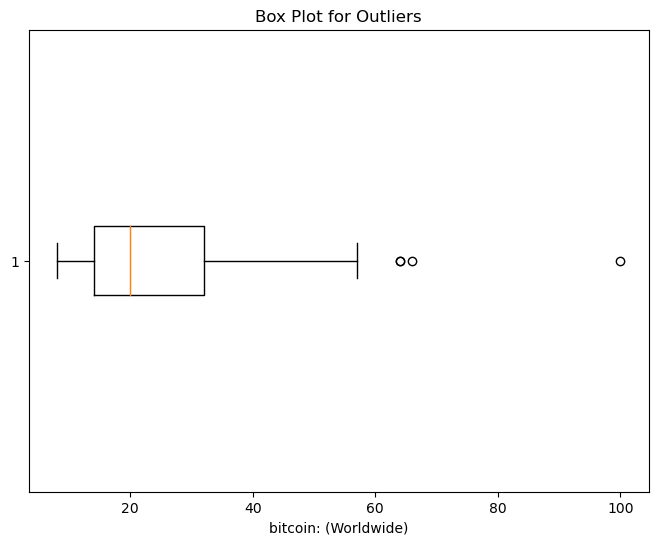

Summary Statistics of Cleaned Trends Dataset:
       bitcoin: (Worldwide)
count             71.000000
mean              25.549296
std               16.692846
min                8.000000
25%               14.000000
50%               20.000000
75%               32.000000
max              100.000000


In [27]:
# Step 1: Check for missing values
missing_values = trends_df.isnull().sum()
print("Missing Values:")
print(missing_values)


# Step 2: Convert data types
trends_df['Month'] = pd.to_datetime(trends_df['Month'])

# Step 3: (Optional) Handle duplicate rows
duplicate_rows = trends_df.duplicated()
print("Duplicate Rows:")
print(trends_df[duplicate_rows])

# If there are duplicate rows, you can remove them.
trends_df.drop_duplicates(inplace=True)

# Step 4: check outliers
column_of_interest = 'bitcoin: (Worldwide)'

# Step 5: Create a box plot to visualize the data distribution and potential outliers
plt.figure(figsize=(8, 6))
plt.boxplot(trends_df[column_of_interest], vert=False)
plt.xlabel(column_of_interest)
plt.title('Box Plot for Outliers')
plt.show()

# Step 6: Perform a basic summary of the cleaned dataset
print("Summary Statistics of Cleaned Trends Dataset:")
print(trends_df.describe())


In [28]:
# Step 4: Removing outliers
# Calculate the interquartile range (IQR) for the column of interest
Q1 = trends_df[column_of_interest].quantile(0.25)
Q3 = trends_df[column_of_interest].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers based on the upper and lower bounds
trends_df = trends_df[(trends_df[column_of_interest] >= lower_bound) & (trends_df[column_of_interest] <= upper_bound)]


## Unique Data Visualization

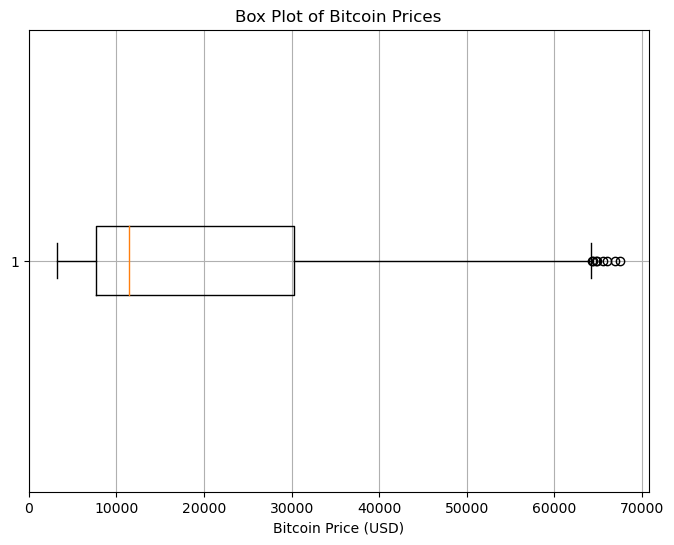

In [29]:
# Box Plot for Bitcoin Prices
plt.figure(figsize=(8, 6))
plt.boxplot(bitcoin_df['close'], vert=False)
plt.xlabel('Bitcoin Price (USD)')
plt.title('Box Plot of Bitcoin Prices')
plt.grid(True)
plt.show()

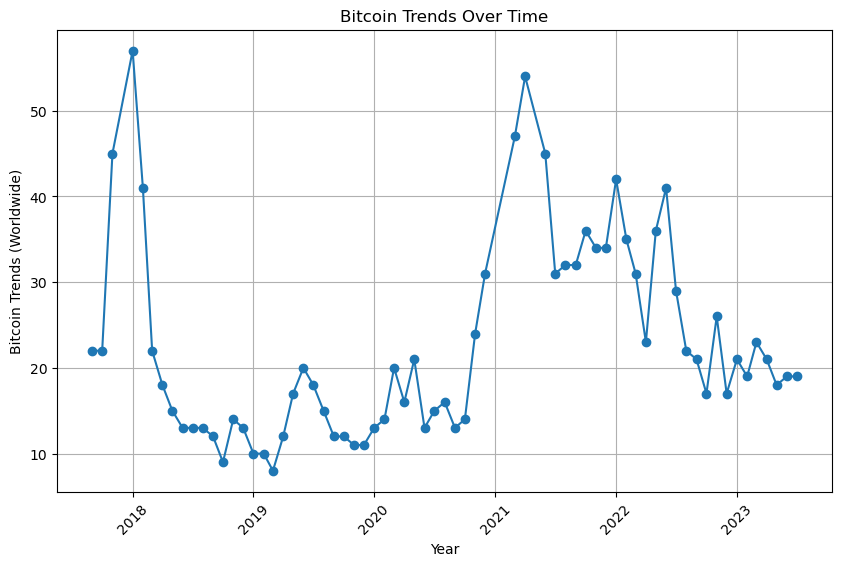

In [30]:
# Assuming the "Month" column is in datetime format, we can create a line plot for bitcoin trends over time.
plt.figure(figsize=(10, 6))
plt.plot(trends_df['Month'], trends_df['bitcoin: (Worldwide)'], marker='o')
plt.xlabel('Year')
plt.ylabel('Bitcoin Trends (Worldwide)')
plt.title('Bitcoin Trends Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

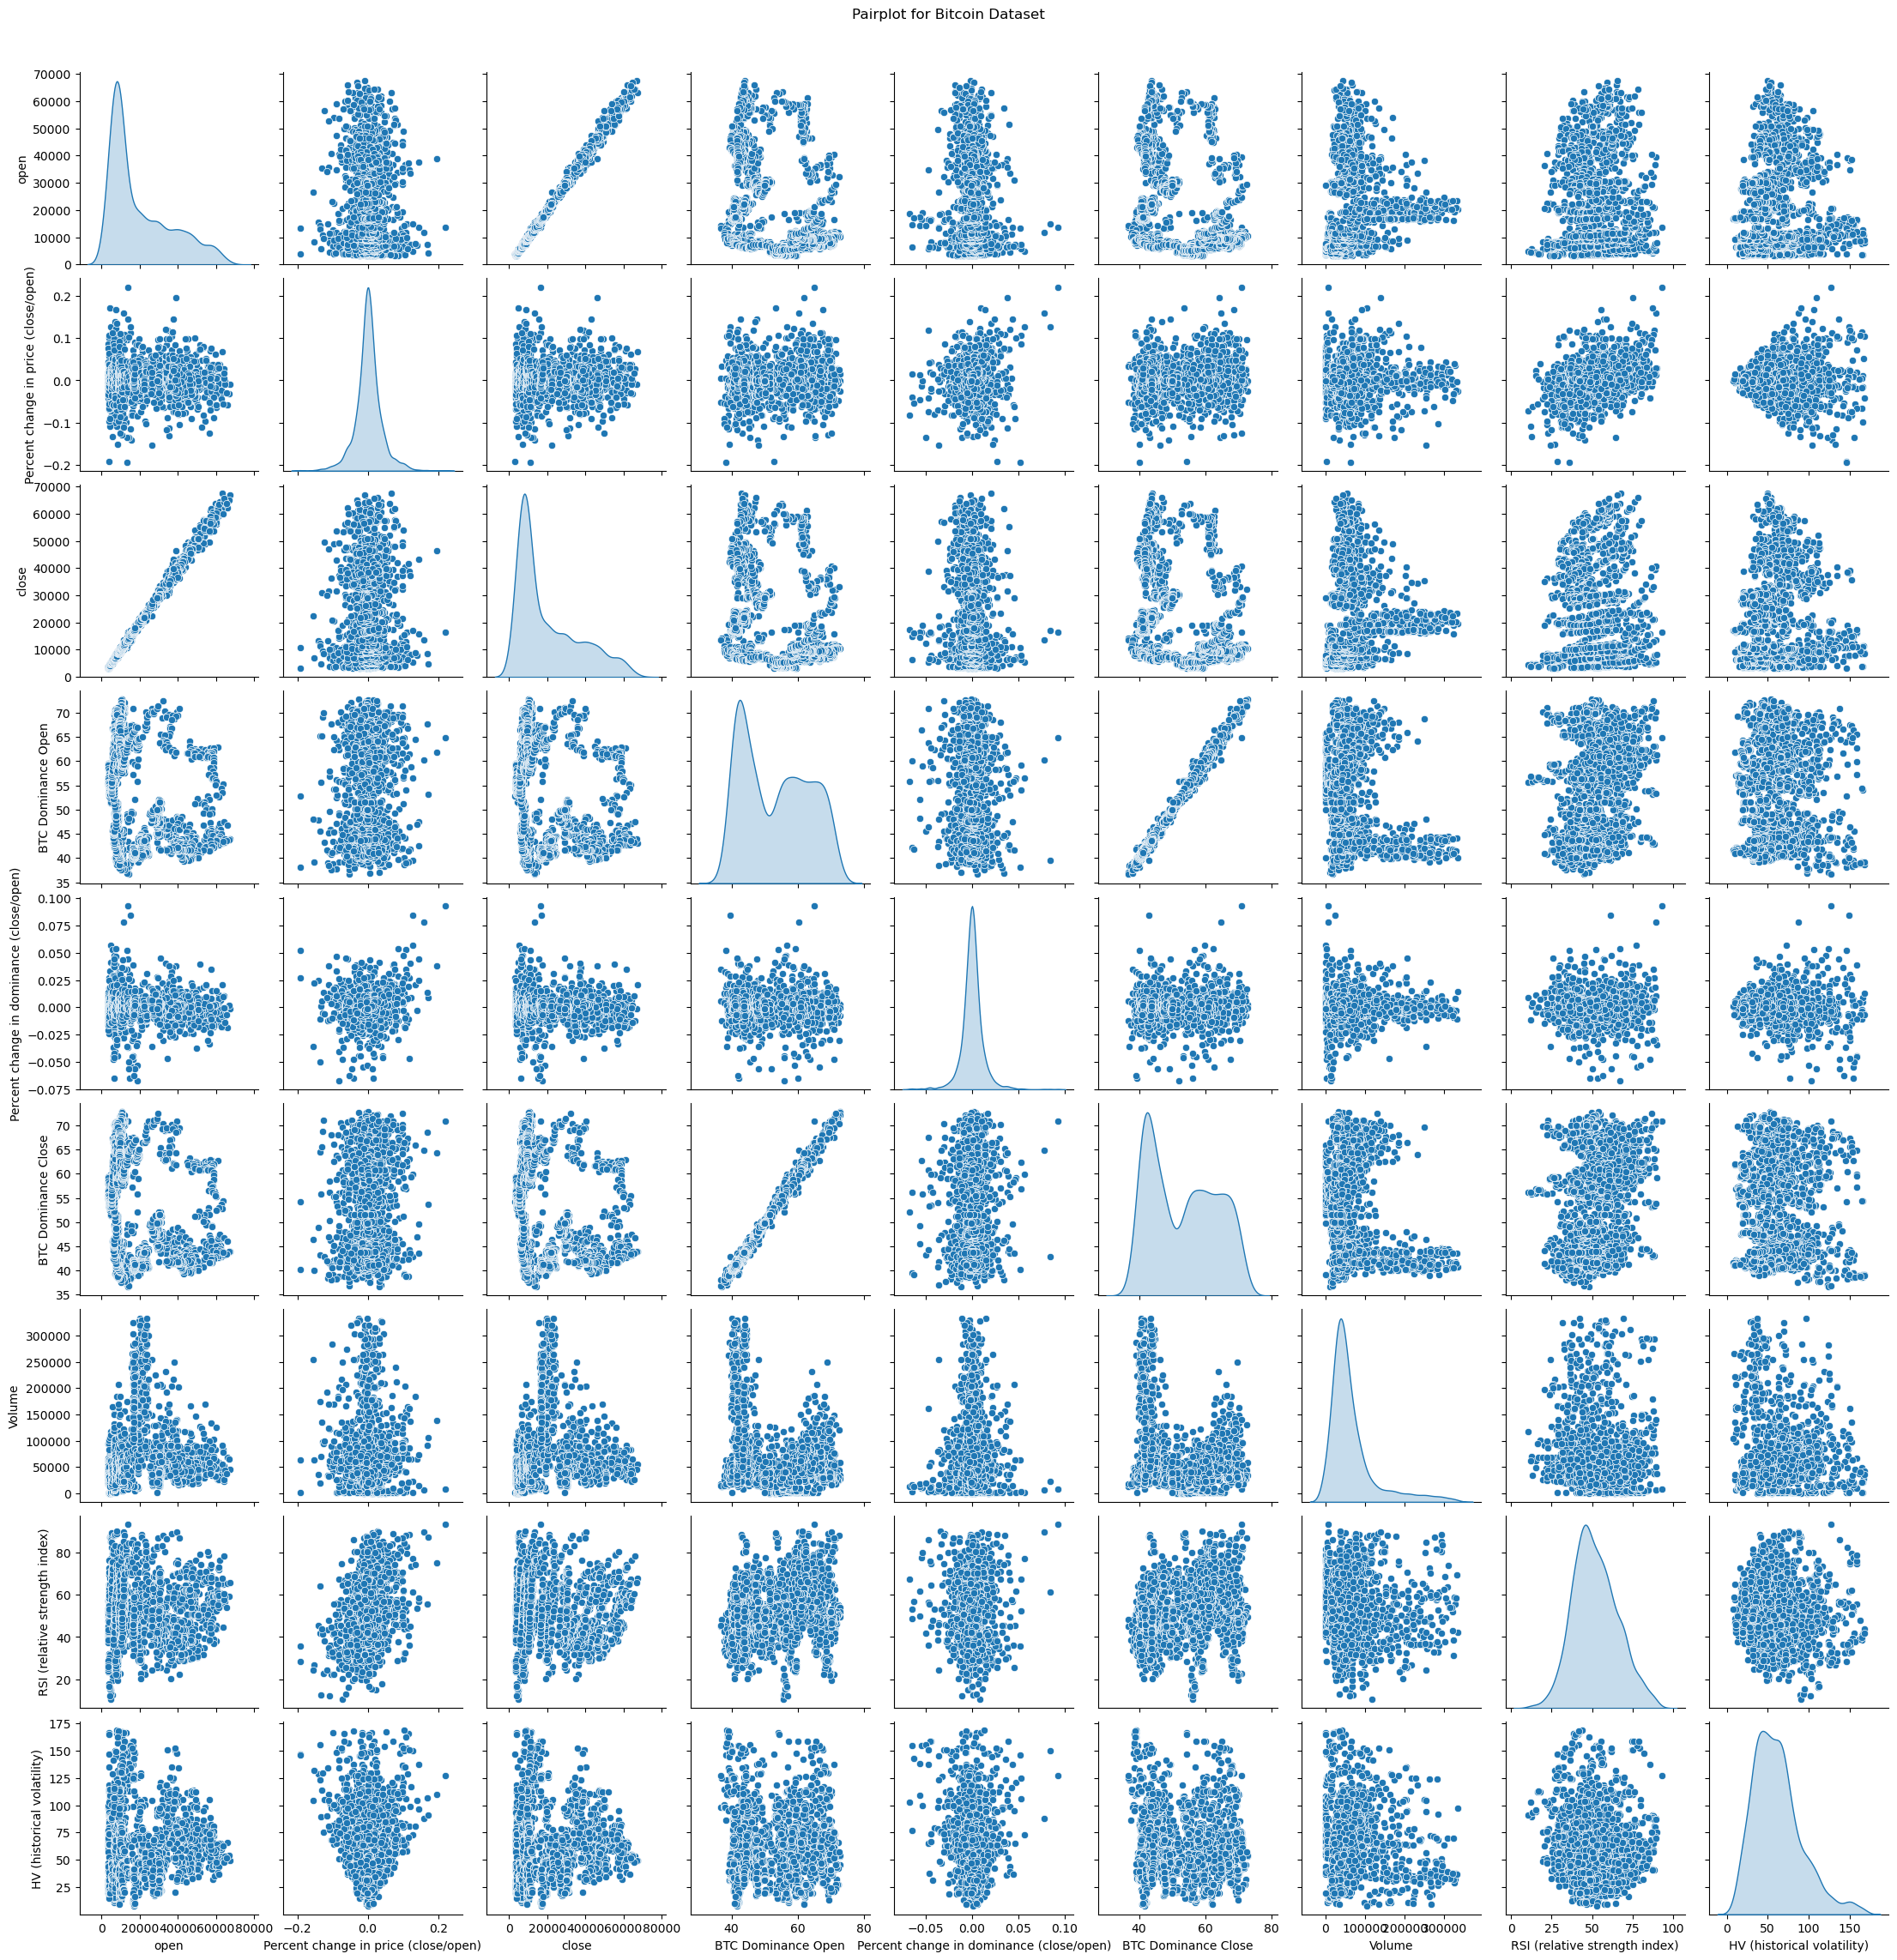

In [31]:
import seaborn as sns
# Visualizations for the "bitcoin" dataset
# Let's create a pairplot to visualize the relationships between numerical columns.
sns.pairplot(bitcoin_df, diag_kind='kde')
plt.suptitle('Pairplot for Bitcoin Dataset', y=1.02)
plt.show()

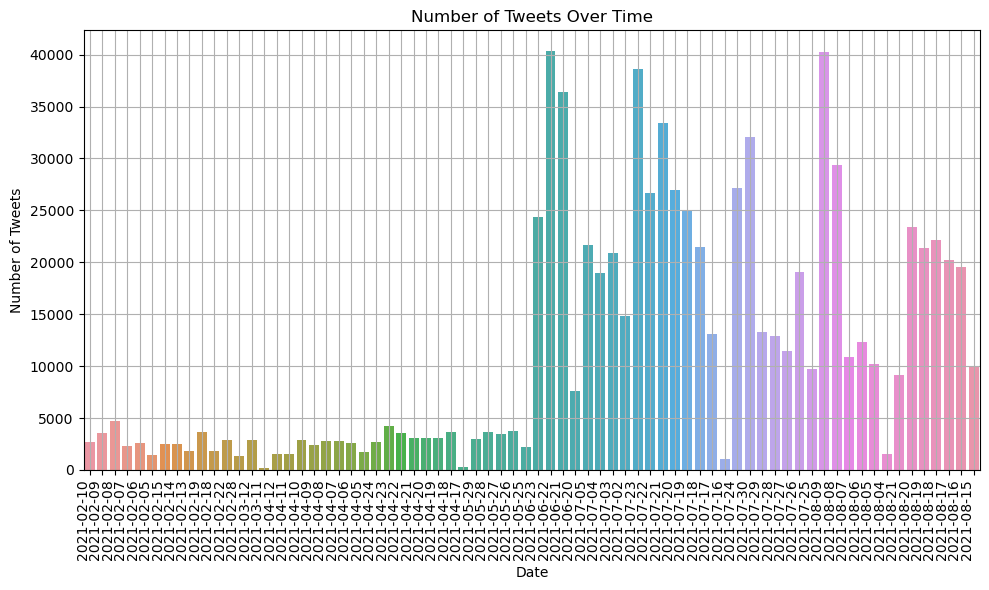

In [32]:
# Visualizations for the "tweets" dataset

plt.figure(figsize=(10, 6))
sns.countplot(x='Date', data=tweets_df)
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets Over Time')
plt.xticks(rotation=90, ha='right')  # Rotate the labels 45 degrees and align them to the right
plt.tight_layout()  # Adjust spacing to prevent overlapping
plt.grid(True)
plt.show()

(array([17167., 17532., 17897., 18262., 18628., 18993., 19358.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

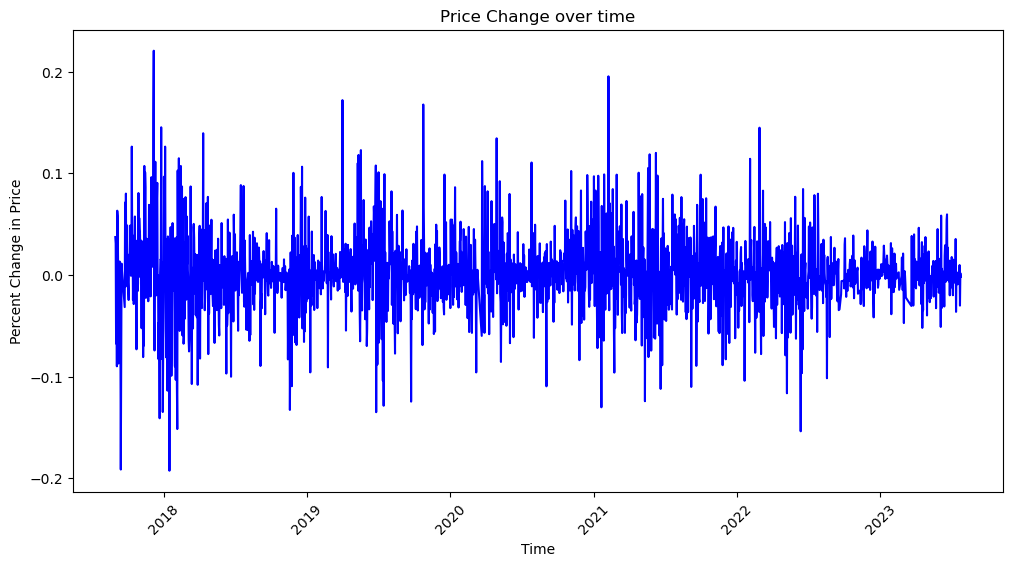

In [33]:
# Price evolution over time
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_df['Date'], bitcoin_df['Percent change in price (close/open)'], label='Price Change', color='blue')
plt.xlabel('Time')
plt.ylabel('Percent Change in Price')
plt.title('Price Change over time')
plt.xticks(rotation=45)

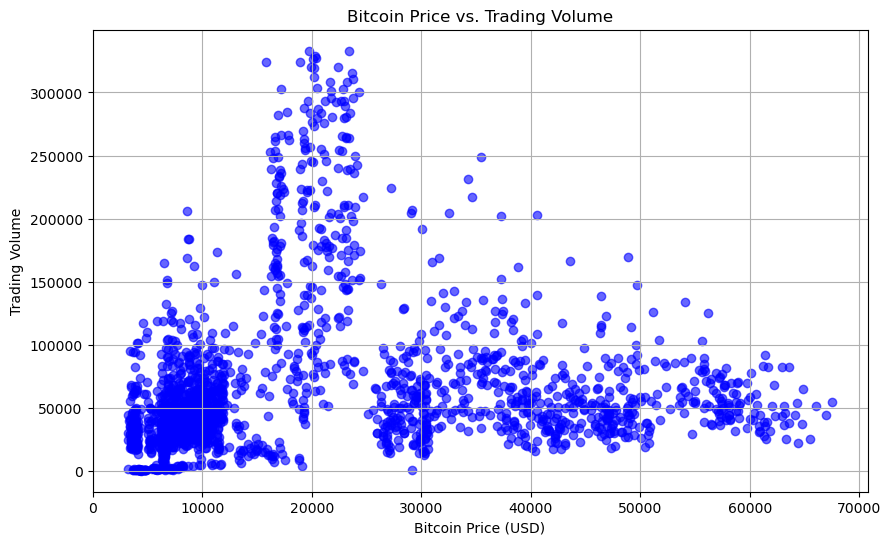

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(bitcoin_df['close'], bitcoin_df['Volume'], color='blue', alpha=0.6)
plt.xlabel('Bitcoin Price (USD)')
plt.ylabel('Trading Volume')
plt.title('Bitcoin Price vs. Trading Volume')
plt.grid(True)
plt.show()


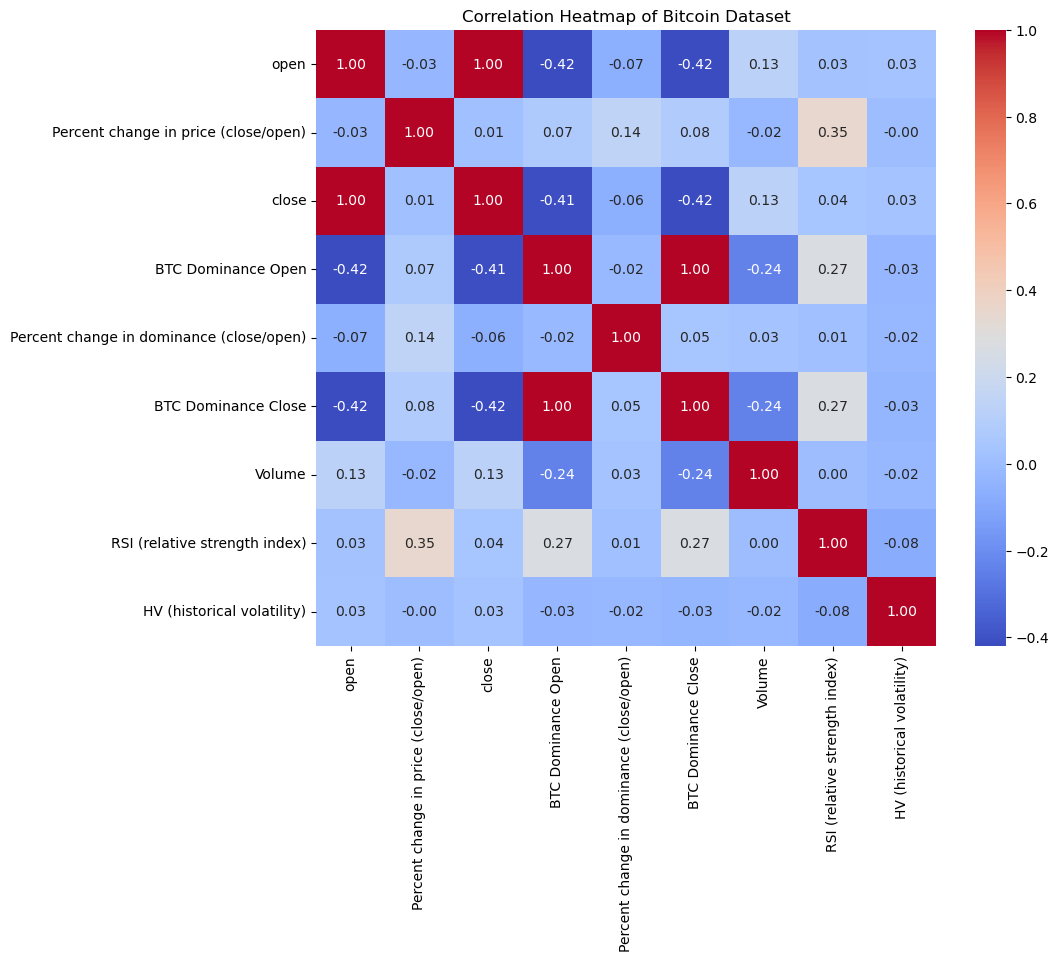

In [35]:
# Calculate the correlation matrix
correlation_matrix = bitcoin_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Bitcoin Dataset')
plt.show()


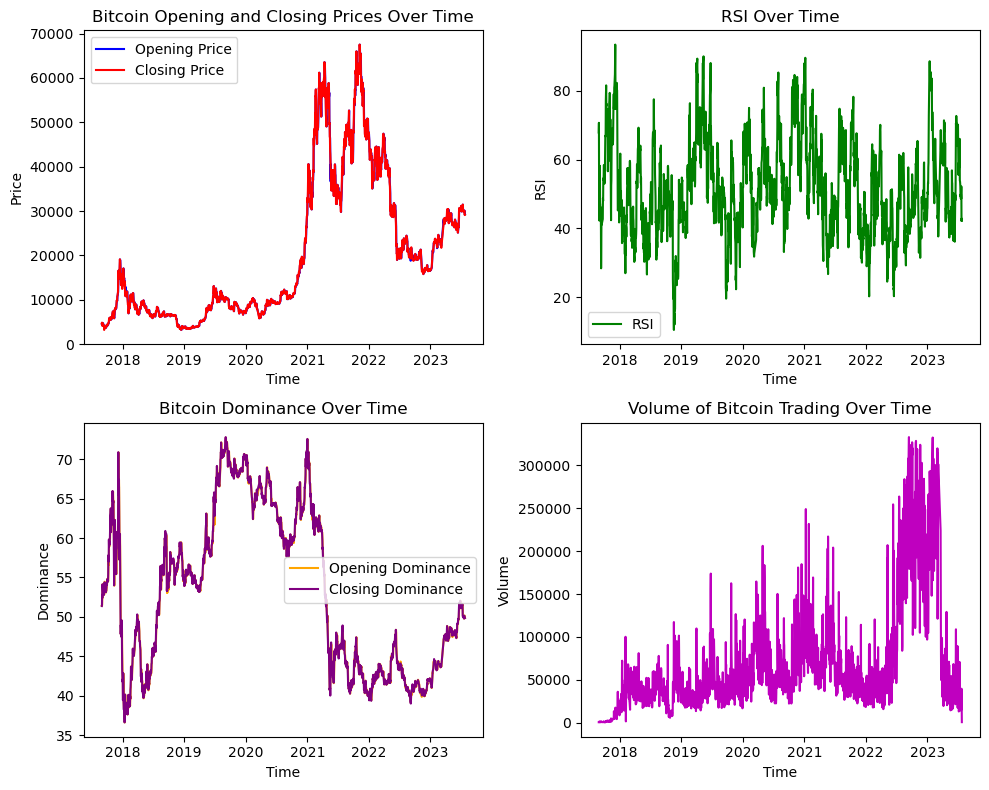

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.plot(bitcoin_df['Date'], bitcoin_df['open'], label='Opening Price', color='b')
plt.plot(bitcoin_df['Date'], bitcoin_df['close'], label='Closing Price', color='r')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Bitcoin Opening and Closing Prices Over Time')
plt.legend()


plt.subplot(2, 2, 2)  # 4 rows, 1 column, plot 2
plt.plot(bitcoin_df['Date'], bitcoin_df['RSI (relative strength index)'], label='RSI', color='g')
plt.xlabel('Time')
plt.ylabel('RSI')
plt.title('RSI Over Time')
plt.legend()

# Plot 3: Bitcoin Dominance Over Time
plt.subplot(2, 2, 3)
plt.plot(bitcoin_df['Date'], bitcoin_df['BTC Dominance Open'], label='Opening Dominance', color='orange')
plt.plot(bitcoin_df['Date'], bitcoin_df['BTC Dominance Close'], label='Closing Dominance', color='purple')
plt.xlabel('Time')
plt.ylabel('Dominance')
plt.title('Bitcoin Dominance Over Time')
plt.legend()

# Plot 4: Volume of Bitcoin Trading Over Time
plt.subplot(2, 2, 4)
plt.plot(bitcoin_df['Date'], bitcoin_df['Volume'], label='Volume', color='m')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.title('Volume of Bitcoin Trading Over Time')

# Adjust layout for better visualization
plt.tight_layout()
#plt.figsize(15, 60)

# Show the plots
plt.show()

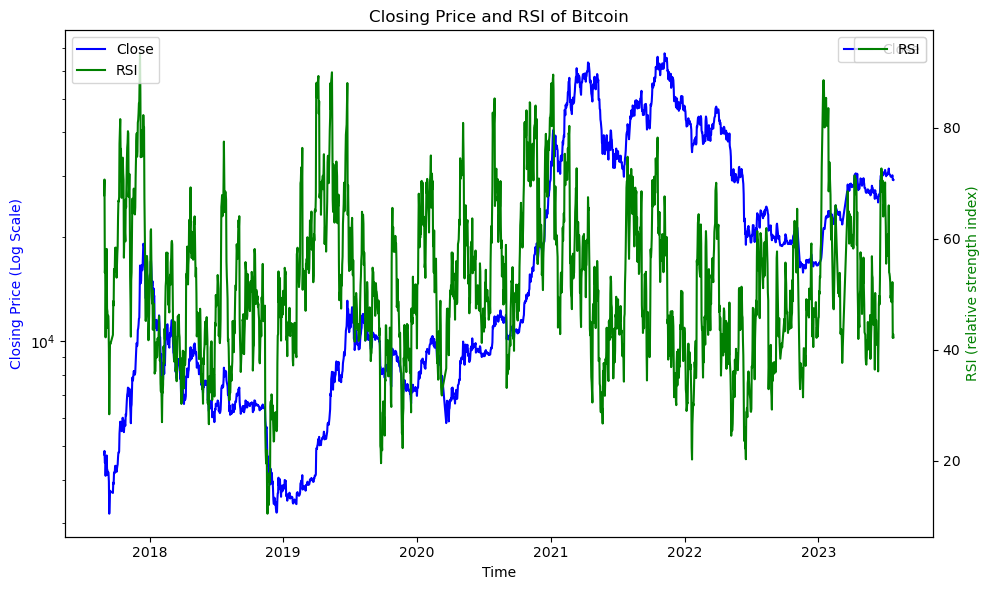

In [37]:
# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))



# Plot closing price on the first (left) y-axis
sns.lineplot(data=bitcoin_df, x='Date', y='close',
label='Close', color='blue', ax=ax1)



# Set the scale of the y-axis to logarithmic
ax1.set_yscale('log')



# Create the second (right) y-axis that shares the same x-axis
ax2 = ax1.twinx()



# Plot RSI on the second (right) y-axis
sns.lineplot(data=bitcoin_df, x='Date', y='RSI (relative strength index)',
label='RSI', color='green', ax=ax2)



# Set labels and title
ax1.set_xlabel('Time')
ax1.set_ylabel('Closing Price (Log Scale)', color='blue')
ax2.set_ylabel('RSI (relative strength index)', color='green')
plt.title('Closing Price and RSI of Bitcoin')



# Show the legend
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)



plt.tight_layout()
plt.show()



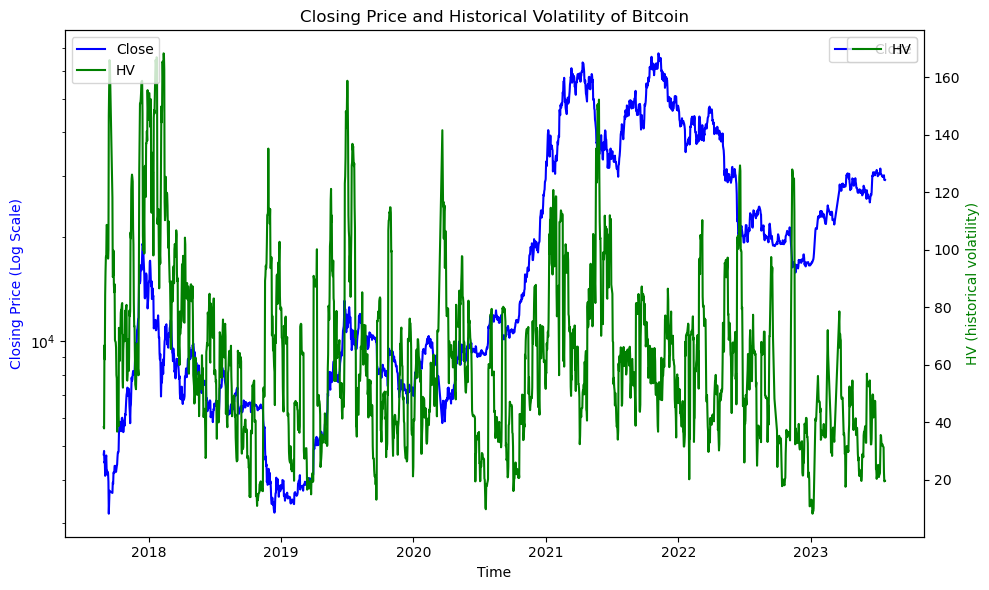

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot closing price on the first (left) y-axis
sns.lineplot(data=bitcoin_df, x='Date', y='close', 
              label='Close', color='blue', ax=ax1)

# Set the scale of the y-axis to logarithmic
ax1.set_yscale('log')

# Create the second (right) y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot HV on the second (right) y-axis
sns.lineplot(data=bitcoin_df, x='Date', y='HV (historical volatility)', 
              label='HV', color='green', ax=ax2)

# Set labels and title
ax1.set_xlabel('Time')
ax1.set_ylabel('Closing Price (Log Scale)', color='blue')
ax2.set_ylabel('HV (historical volatility)', color='green')
plt.title('Closing Price and Historical Volatility of Bitcoin')

# Show the legend
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.show()



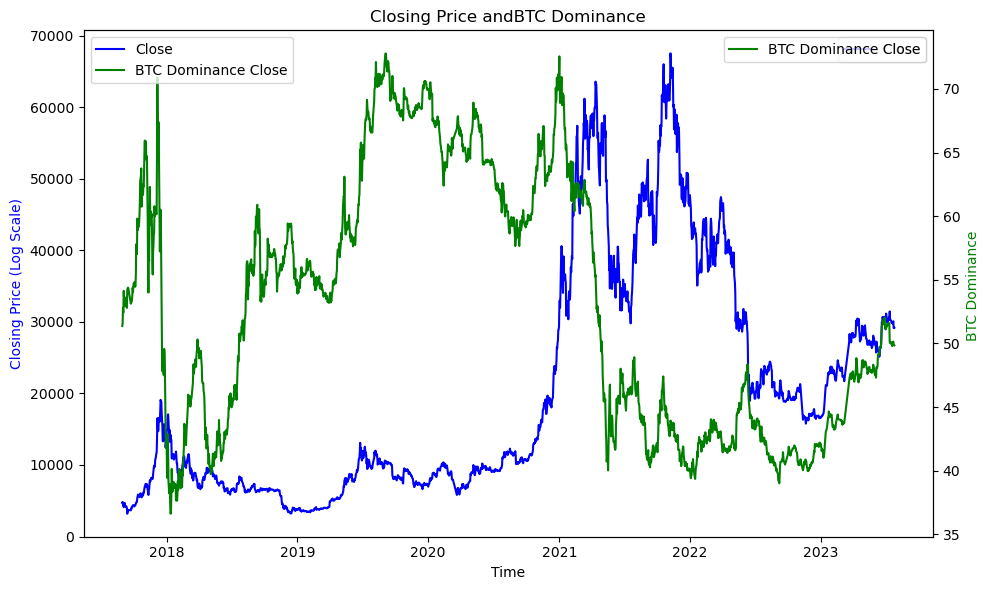

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot closing price on the first (left) y-axis
sns.lineplot(data=bitcoin_df, x='Date', y='close', 
              label='Close', color='blue', ax=ax1)

# Set the scale of the y-axis to logarithmic
#ax1.set_yscale('log')

# Create the second (right) y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot HV on the second (right) y-axis
sns.lineplot(data=bitcoin_df, x='Date', y='BTC Dominance Close', 
              label='BTC Dominance Close', color='green', ax=ax2)

# Set labels and title
ax1.set_xlabel('Time')
ax1.set_ylabel('Closing Price (Log Scale)', color='blue')
ax2.set_ylabel('BTC Dominance ', color='green')
plt.title('Closing Price andBTC Dominance')

# Show the legend
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.show()

## Most Frequent Words in Tweets

In [40]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [41]:
from wordcloud import WordCloud


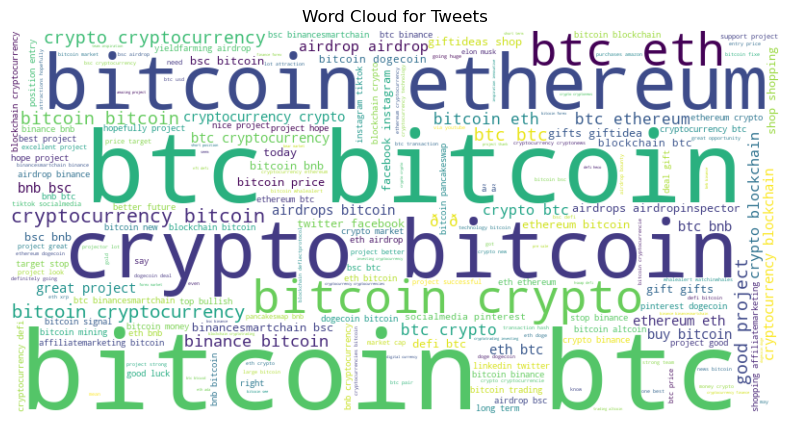

In [42]:
# Combine all tweets into a single string
combined_text = ' '.join(tweets_df['cleanText'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(combined_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Tweets')
plt.show()

## Combining Datasets: Tweets and Bitcoin Data

#### The goal here is to combine the 71 rows of tweets data starting from 2021 Feburary 06th with same period of bitcoin data 

#### Here selected_df2 represents that particular time period rows of bitcoin data and result_df is the one with the tweet_counts. We join them into merged_df

In [43]:
selected_df2 = bitcoin_df.iloc[1237:1309, [0,1,2,3,4,5,6,7,8,9]]
selected_df2.reset_index(drop=True, inplace=True)
selected_df2.head()

time      open  Percent change in price (close/open)  \
0  2021-02-06T19:00:00-05:00  39181.01                             -0.009834   
1  2021-02-07T19:00:00-05:00  38795.69                              0.195361   
2  2021-02-08T19:00:00-05:00  46374.86                              0.000982   
3  2021-02-09T19:00:00-05:00  46420.42                             -0.034744   
4  2021-02-10T19:00:00-05:00  44807.58                              0.070567   

      close  BTC Dominance Open  Percent change in dominance (close/open)  \
0  38795.69           61.884005                                  0.000632   
1  46374.87           61.909107                                  0.037875   
2  46420.42           64.185033                                 -0.013727   
3  44807.58           63.088062                                 -0.023384   
4  47969.51           61.587189                                  0.012657   

   BTC Dominance Close        Volume  RSI (relative strength index)  \
0            61.923141   84363.67976                      63.100905   
1            64.253913  138589.68870                      75.264492   
2            63.303987  115499.86170                      75.317153   
3            61.612823   97154.18220                      69.661876   
4            62.366702   89561.08145                      73.813212   

   HV (historical volatility)  
0                   56.331746  
1                  109.652820  
2                  109.586593  
3                  109.721702  
4                  111.096200

In [44]:
result_df.reset_index(drop=True, inplace=True)

new_column_names = {col: col + '_tweetcount' if col in result_df.columns[-6:] else col for col in result_df.columns}
result_df.rename(columns=new_column_names, inplace=True)
#result_df.drop('Date', axis=1, inplace=True)
result_df.head()

Date  bitcoin_tweetcount  btc_tweetcount  crypto_tweetcount  \
0  2021-02-06                1869            1847                481   
1  2021-02-07                1414            1288                438   
2  2021-02-08                4093            3589                919   
3  2021-02-09                2790            2486                590   
4  2021-02-10                1980            1746                494   

   cryptocurrency_tweetcount  project_tweetcount  total count_tweetcount  
0                        264                  45                    4506  
1                        170                  27                    3337  
2                        420                  35                    9056  
3                        431                  38                    6335  
4                        247                  24                    4491

In [45]:
# Merge the two DataFrames based on the index (join without a common column)
merged_df = selected_df2.join(result_df)
merged_df.reset_index(drop=True, inplace=True)
merged_df.index += 1 # To start the index from 1 instead of 0
merged_df.head()



time      open  Percent change in price (close/open)  \
1  2021-02-06T19:00:00-05:00  39181.01                             -0.009834   
2  2021-02-07T19:00:00-05:00  38795.69                              0.195361   
3  2021-02-08T19:00:00-05:00  46374.86                              0.000982   
4  2021-02-09T19:00:00-05:00  46420.42                             -0.034744   
5  2021-02-10T19:00:00-05:00  44807.58                              0.070567   

      close  BTC Dominance Open  Percent change in dominance (close/open)  \
1  38795.69           61.884005                                  0.000632   
2  46374.87           61.909107                                  0.037875   
3  46420.42           64.185033                                 -0.013727   
4  44807.58           63.088062                                 -0.023384   
5  47969.51           61.587189                                  0.012657   

   BTC Dominance Close        Volume  RSI (relative strength index)  \
1            61.923141   84363.67976                      63.100905   
2            64.253913  138589.68870                      75.264492   
3            63.303987  115499.86170                      75.317153   
4            61.612823   97154.18220                      69.661876   
5            62.366702   89561.08145                      73.813212   

   HV (historical volatility)        Date  bitcoin_tweetcount  btc_tweetcount  \
1                   56.331746  2021-02-06              1869.0          1847.0   
2                  109.652820  2021-02-07              1414.0          1288.0   
3                  109.586593  2021-02-08              4093.0          3589.0   
4                  109.721702  2021-02-09              2790.0          2486.0   
5                  111.096200  2021-02-10              1980.0          1746.0   

   crypto_tweetcount  cryptocurrency_tweetcount  project_tweetcount  \
1              481.0                      264.0                45.0   
2              438.0                      170.0                27.0   
3              919.0                      420.0                35.0   
4              590.0                      431.0                38.0   
5              494.0                      247.0                24.0   

   total count_tweetcount  
1                  4506.0  
2                  3337.0  
3                  9056.0  
4                  6335.0  
5                  4491.0

## Performing Visualizations on merged_df

In [46]:
merged_df.describe()

open  Percent change in price (close/open)         close  \
count     72.000000                             72.000000     72.000000   
mean   53925.604167                              0.005764  54154.335417   
std     5607.848932                              0.042943   5326.852923   
min    38795.690000                             -0.096079  38795.690000   
25%    48888.800000                             -0.019272  49072.837500   
50%    55797.395000                              0.001051  55797.385000   
75%    58110.652500                              0.027835  58112.345000   
max    63575.010000                              0.195361  63575.000000   

       BTC Dominance Open  Percent change in dominance (close/open)  \
count           72.000000                                 72.000000   
mean            60.270291                                 -0.001626   
std              2.803205                                  0.010337   
min             52.452036                                 -0.024008   
25%             60.041855                                 -0.008285   
50%             61.436542                                 -0.000677   
75%             61.938812                                  0.004046   
max             64.185033                                  0.037875   

       BTC Dominance Close         Volume  RSI (relative strength index)  \
count            72.000000      72.000000                      72.000000   
mean             60.175782   73675.051492                      60.758506   
std               2.934712   24296.748587                       9.073105   
min              52.442062   39050.387510                      42.620062   
25%              59.453442   55206.881803                      54.418724   
50%              61.437962   71442.571370                      59.760003   
75%              61.954751   83744.018705                      67.438433   
max              64.253913  169375.025100                      80.336419   

       HV (historical volatility)  bitcoin_tweetcount  btc_tweetcount  \
count                   72.000000           71.000000       71.000000   
mean                    71.587578        10874.352113     5708.718310   
std                     22.872224        11875.847981     5046.765313   
min                     32.310109            0.000000        0.000000   
25%                     53.194304         2005.000000     1811.500000   
50%                     66.258356         4317.000000     4148.000000   
75%                     93.117032        22927.000000     6718.000000   
max                    113.692464        45838.000000    22123.000000   

       crypto_tweetcount  cryptocurrency_tweetcount  project_tweetcount  \
count          71.000000                  71.000000           71.000000   
mean         3310.478873                1973.535211         1827.450704   
std          3125.326186                1818.939918         2339.356925   
min             0.000000                   0.000000            0.000000   
25%           589.500000                 369.500000           44.000000   
50%          1873.000000                1197.000000          154.000000   
75%          6337.000000                3766.000000         3465.000000   
max         11849.000000                6147.000000         8169.000000   

       total count_tweetcount  
count               71.000000  
mean             23694.535211  
std              21961.397830  
min                  3.000000  
25%               4787.000000  
50%              12636.000000  
75%              43878.500000  
max              79332.000000

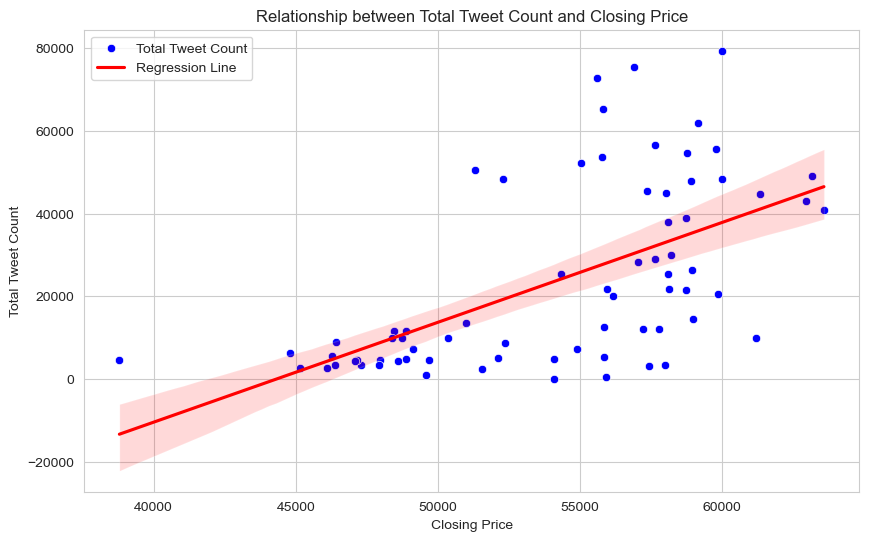

In [51]:
sns.set_style("whitegrid")

# Create a scatter plot for total_tweetcount and closing price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='close', y='total count_tweetcount', color='blue', label='Total Tweet Count')
sns.regplot(data=df3, x='close', y='total count_tweetcount', color='red', scatter=False, label='Regression Line')

plt.xlabel('Closing Price')
plt.ylabel('Total Tweet Count')
plt.title('Relationship between Total Tweet Count and Closing Price')
plt.legend()
plt.show()

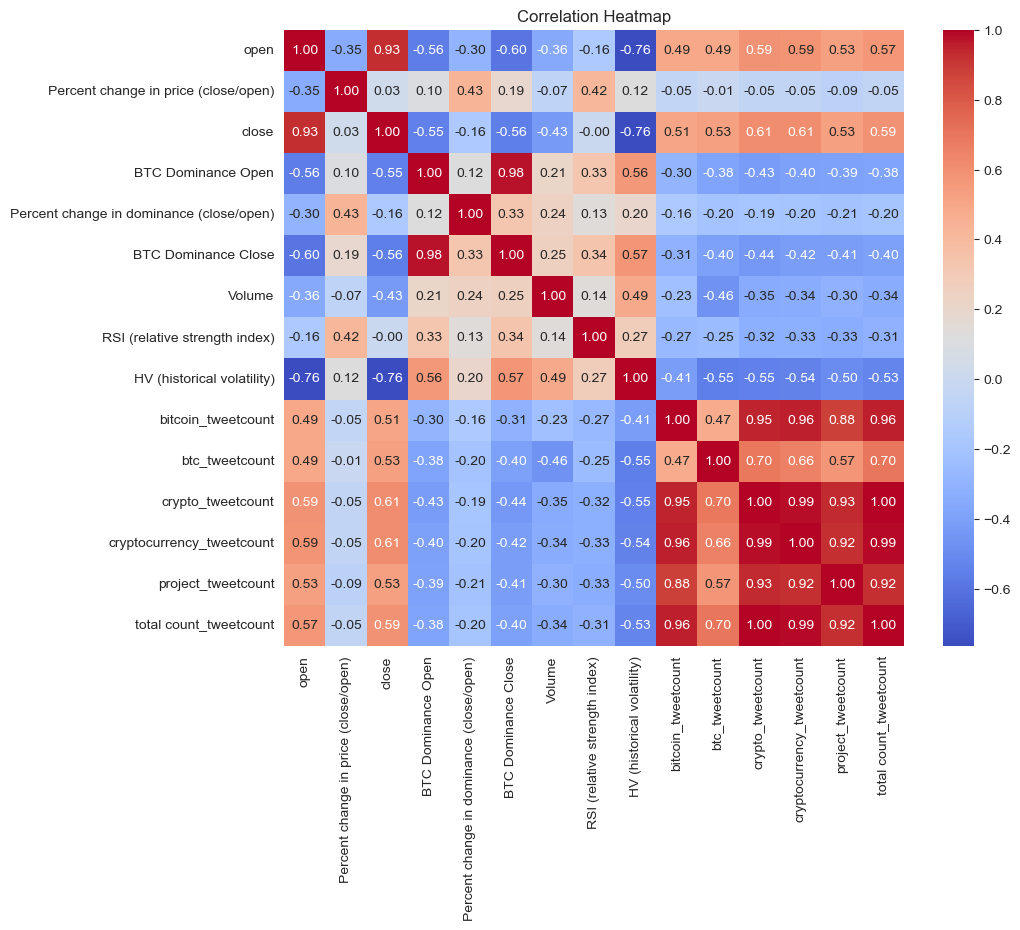

In [52]:
correlation_matrix = merged_df.corr()

# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Next Steps

The current progress of the project includes data cleaning, visualization, and feature engineering. The next steps for the project can be as follows:

Time-Series Analysis: Perform time-series analysis on the Bitcoin price data to identify trends, seasonality, and patterns. This can help in building more accurate forecasting models.

Sentiment Analysis: Conduct sentiment analysis on the tweets data to classify tweets as positive, negative, or neutral sentiment. This can provide valuable insights into the overall sentiment related to Bitcoin on Twitter.

Bitcoin Price Forecasting: Use the cleaned and combined dataset to build predictive models for forecasting Bitcoin prices. Explore various time-series forecasting techniques such as ARIMA, LSTM, or Prophet.

Sentiment Predictor: Develop a machine learning model to predict the sentiment of tweets about Bitcoin. This can be done using natural language processing (NLP) techniques and sentiment analysis libraries.

Feature Importance: Analyze the importance of different features in predicting Bitcoin prices and sentiment. This can provide insights into which variables have the most significant impact on the outcomes.

Model Evaluation and Deployment: Evaluate the performance of the forecasting and sentiment prediction models using appropriate metrics. Once the models are deemed accurate and reliable, they can be deployed for real-time predictions.

Interactive Dashboard: Create an interactive dashboard using tools like Plotly or Dash to visualize the forecasted Bitcoin prices, sentiment trends, and other relevant insights.